In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as pl
import yfinance as yf
import tensorflow as tf
import tf2onnx
df = yf.download("NFLX.NE", start="2000-01-01", end="2025-12-31")
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NFLX.NE,NFLX.NE,NFLX.NE,NFLX.NE,NFLX.NE
Date,,,,,
2021-08-25,22.510000,22.510000,22.500000,22.500000,320
2021-08-26,22.590000,22.639999,22.559999,22.600000,742
2021-08-27,22.870001,22.870001,22.840000,22.840000,589
2021-08-30,23.240000,23.240000,23.139999,23.209999,1519
2021-08-31,23.190001,23.260000,23.070000,23.260000,2270
...,...,...,...,...,...
2025-12-22,35.549999,36.130001,35.439999,36.130001,62895
2025-12-23,35.630001,35.709999,35.389999,35.630001,55953


In [2]:
df = df.reset_index()
df.head()
df = df.drop(['Date'], axis = 1)
df.head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4416\4068612620.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,NFLX.NE,NFLX.NE,NFLX.NE,NFLX.NE,NFLX.NE
0,22.510000,22.510000,22.500000,22.500000,320
1,22.590000,22.639999,22.559999,22.600000,742
2,22.870001,22.870001,22.840000,22.840000,589
3,23.240000,23.240000,23.139999,23.209999,1519
4,23.190001,23.260000,23.070000,23.260000,2270


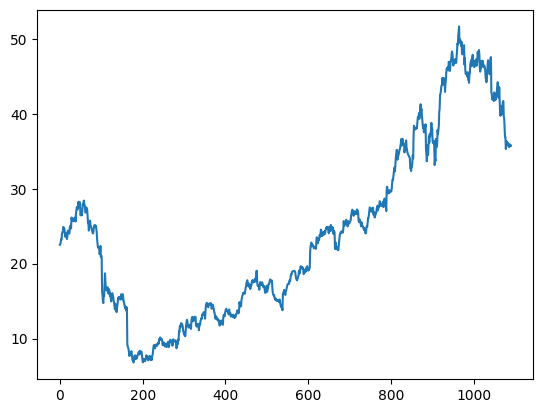

In [3]:
plt.plot(df.Close)

In [4]:
df


Price,Close,High,Low,Open,Volume
Ticker,NFLX.NE,NFLX.NE,NFLX.NE,NFLX.NE,NFLX.NE
0,22.510000,22.510000,22.500000,22.500000,320
1,22.590000,22.639999,22.559999,22.600000,742
2,22.870001,22.870001,22.840000,22.840000,589
3,23.240000,23.240000,23.139999,23.209999,1519
4,23.190001,23.260000,23.070000,23.260000,2270
...,...,...,...,...,...
1086,35.549999,36.130001,35.439999,36.130001,62895
1087,35.630001,35.709999,35.389999,35.630001,55953
1088,35.689999,35.689999,35.369999,35.549999,19154


In [5]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,NFLX.NE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1086,43.7451
1087,43.6557
1088,43.5670
1089,43.4845


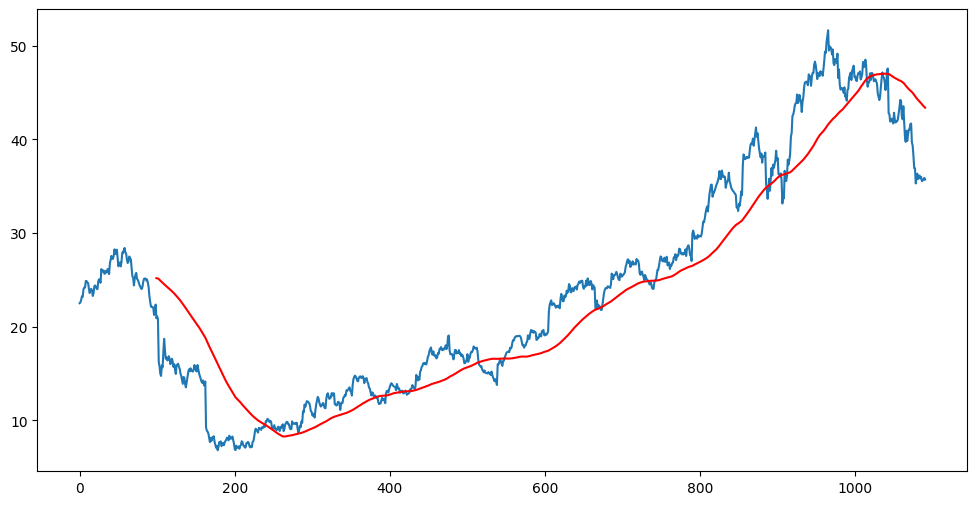

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [7]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,NFLX.NE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1086,43.59185
1087,43.60170
1088,43.60635
1089,43.60680


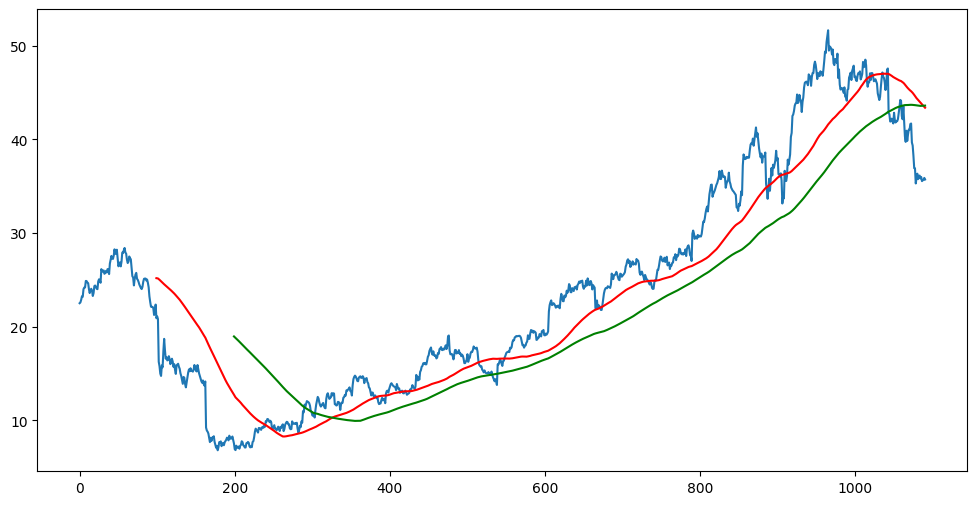

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [9]:
df.shape

(1091, 5)

In [10]:
# Spliting Data into Tranning and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(763, 1)
(328, 1)


In [11]:
data_training.head()

Ticker,NFLX.NE
0,22.510000
1,22.590000
2,22.870001
3,23.240000
4,23.190001


In [12]:
data_testing.head()

Ticker,NFLX.NE
763,26.510000
764,26.809999
765,26.850000
766,27.400000
767,27.330000


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[7.26978264e-01],
       [7.30680250e-01],
       [7.43637247e-01],
       [7.60758901e-01],
       [7.58445192e-01],
       [7.96390574e-01],
       [8.04257306e-01],
       [8.04720066e-01],
       [8.37112424e-01],
       [8.36186994e-01],
       [8.29245692e-01],
       [8.26006465e-01],
       [7.96853334e-01],
       [7.76955124e-01],
       [7.91300310e-01],
       [7.98241523e-01],
       [7.88523842e-01],
       [7.62609938e-01],
       [7.77417883e-01],
       [8.11661279e-01],
       [8.14437747e-01],
       [8.07496533e-01],
       [7.98241523e-01],
       [7.96390574e-01],
       [8.34798716e-01],
       [8.44979156e-01],
       [8.39426221e-01],
       [8.27857502e-01],
       [8.95418775e-01],
       [8.85238335e-01],
       [8.82461867e-01],
       [8.88940321e-01],
       [8.72281339e-01],
       [8.76908844e-01],
       [8.86626525e-01],
       [8.78759881e-01],
       [8.95418775e-01],
       [8.95418775e-01],
       [8.70893149e-01],
       [9.23183717e-01],


In [15]:
data_training_array.shape

(763, 1)

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train) , np.array(y_train)
    

In [17]:
x_train.shape

(663, 100, 1)

In [18]:
# ML MODEL

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1)) 

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          26,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,411 (423.48 KB)

 Trainable params: 108,411 (423.48 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - loss: 0.1202
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - loss: 0.0428
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0281
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0259
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - loss: 0.0198
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - loss: 0.0203
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - loss: 0.0213
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0190
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0197
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0176
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0174
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - loss: 0.0171
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 0.0144
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0153
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - l

In [50]:
import tensorflow as tf
import tf2onnx

# Load model
model = tf.keras.models.load_model("finsense_model.keras", compile=False)

# Create a concrete function (important for Keras 3)
spec = tf.TensorSpec(
    (None, model.input_shape[1], model.input_shape[2]),
    tf.float32,
    name="input"
)

@tf.function(input_signature=[spec])
def model_fn(x):
    return model(x)

# Convert
tf2onnx.convert.from_function(
    model_fn,
    input_signature=[spec],
    output_path="finsense_model.onnx",
    opset=13
)

print("ONNX model saved as finsense_model.onnx")



rewriter <function rewrite_constant_fold at 0x000001FE6F9589A0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
rewriter <function rewrite_constant_fold at 0x000001FE6F9589A0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
rewriter <function rewrite_constant_fold at 0x000001FE6F9589A0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
rewriter <function rewrite_constant_fold at 0x000001FE6F9589A0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
rewriter <function rewrite_constant_fold at 0x000001FE6F9589A0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
rewriter <function rewrite_constant_fold at 0x000001FE6F9589A0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead

ONNX model saved as finsense_model.onnx


In [24]:
data_testing.head()

Ticker,NFLX.NE
763,26.510000
764,26.809999
765,26.850000
766,27.400000
767,27.330000


In [25]:
data_training.tail(100)

Ticker,NFLX.NE
663,24.290001
664,24.180000
665,21.980000
666,21.930000
667,22.799999
...,...
758,26.549999
759,26.719999
760,26.850000
761,26.160000


In [26]:
past_100_days = data_training.tail(100)

In [27]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [28]:
final_df.head()

Ticker,NFLX.NE
0,24.290001
1,24.180000
2,21.980000
3,21.930000
4,22.799999


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08369602],
       [0.08001337],
       [0.00636085],
       [0.00468696],
       [0.03381314],
       [0.00535654],
       [0.01740872],
       [0.01339135],
       [0.01071308],
       [0.        ],
       [0.        ],
       [0.01707393],
       [0.03749578],
       [0.05925673],
       [0.07097419],
       [0.0773351 ],
       [0.079009  ],
       [0.0773351 ],
       [0.08470033],
       [0.08202206],
       [0.08135248],
       [0.07867421],
       [0.09139604],
       [0.12989619],
       [0.11717443],
       [0.11014393],
       [0.12520924],
       [0.12453965],
       [0.12889182],
       [0.13625711],
       [0.12755272],
       [0.11717443],
       [0.10847003],
       [0.10646128],
       [0.1295614 ],
       [0.1282223 ],
       [0.11884832],
       [0.12219618],
       [0.12587876],
       [0.1295614 ],
       [0.13491794],
       [0.15467021],
       [0.16270502],
       [0.17676595],
       [0.18111818],
       [0.16806156],
       [0.17576164],
       [0.153

In [30]:
input_data.shape

(428, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
    

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(328, 100, 1)
(328,)


In [33]:
# Making Predictions

y_predicted = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step


In [34]:
y_predicted.shape

(328, 1)

In [35]:
y_test

array([0.15801806, 0.16806156, 0.16940072, 0.18781382, 0.18547035,
       0.19919649, 0.17810512, 0.19651822, 0.19149647, 0.1971878 ,
       0.21894875, 0.21760965, 0.20455303, 0.19919649, 0.20254434,
       0.19785738, 0.20421824, 0.19986607, 0.21627048, 0.19283557,
       0.21928354, 0.22731835, 0.231001  , 0.21928354, 0.19618343,
       0.19283557, 0.17509206, 0.27217943, 0.28389688, 0.27351853,
       0.25410106, 0.26180114, 0.26180114, 0.25477064, 0.26816199,
       0.26046197, 0.26514893, 0.26347503, 0.26247066, 0.27184463,
       0.29394038, 0.31570133, 0.31402744, 0.32741879, 0.34650147,
       0.36089719, 0.36960165, 0.35219286, 0.38198863, 0.41379314,
       0.43053234, 0.44727155, 0.44827586, 0.40475395, 0.41513218,
       0.4211583 , 0.42852359, 0.43789751, 0.44760627, 0.45329767,
       0.46468021, 0.47438897, 0.49648472, 0.46802812, 0.46836285,
       0.49815861, 0.48443247, 0.47505856, 0.47773689, 0.47572814,
       0.43689319, 0.45162365, 0.4603281 , 0.46401075, 0.49079

In [36]:
y_predicted

array([[0.20331703],
       [0.2039353 ],
       [0.20360237],
       [0.20262738],
       [0.20151031],
       [0.20067897],
       [0.20054522],
       [0.20115845],
       [0.20245464],
       [0.20433368],
       [0.20670226],
       [0.20956948],
       [0.21295127],
       [0.2167015 ],
       [0.22068818],
       [0.22472128],
       [0.22851421],
       [0.23192354],
       [0.23487785],
       [0.23743095],
       [0.23952588],
       [0.24126953],
       [0.24284671],
       [0.24443428],
       [0.2460848 ],
       [0.2476067 ],
       [0.24877316],
       [0.24928361],
       [0.24953368],
       [0.25013265],
       [0.25152722],
       [0.25379562],
       [0.25686413],
       [0.26057923],
       [0.26471326],
       [0.26898277],
       [0.27306837],
       [0.2767969 ],
       [0.28003705],
       [0.2826826 ],
       [0.2847628 ],
       [0.28653857],
       [0.28843212],
       [0.2908113 ],
       [0.29402465],
       [0.29846707],
       [0.30445182],
       [0.312

In [37]:
scaler.scale_

array([0.03347841])

In [48]:
scale_factor = 1 / scaler.scale_[0]

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor



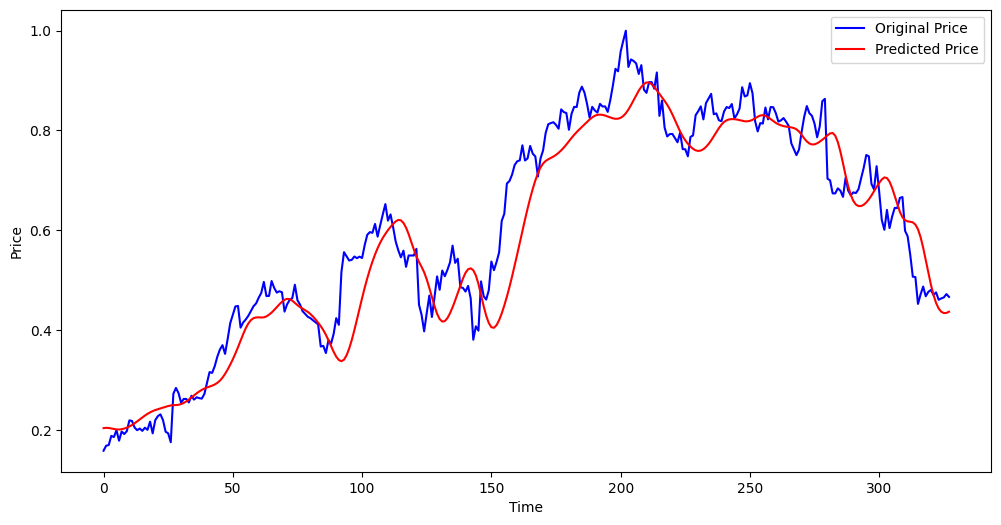

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()